In [1]:
import numpy as np
import pandas as pd
%precision 3
pd.set_option('precision', 3)

In [2]:
df = pd.read_csv('../data/ch2_scores_em.csv', index_col='生徒番号')

In [3]:
en_scores = np.array(df['英語'])[:10]
ma_scores = np.array(df['数学'])[:10]

In [4]:
scores_df = pd.DataFrame({'英語':en_scores, '数学':ma_scores}, index=pd.Index(['A','B','C','D','E','F','G','H','I','J'], name='生徒'))

In [5]:
scores_df

,英語,数学
生徒,,
A,42,65
B,69,80
C,56,63
D,41,63
E,57,76
F,48,60
G,65,81
H,49,66
I,65,78


In [6]:
cov_mat = np.cov(en_scores, ma_scores, ddof=0)
cov_mat

array([[86.  , 62.8 ],
       [62.8 , 68.44]])

In [7]:
cov_mat[0,0], cov_mat[1,1]

(86.0, 68.44000000000001)

In [8]:
np.var(en_scores, ddof=0), np.var(ma_scores, ddof=0)

(86.0, 68.44000000000001)

In [9]:
np.corrcoef(en_scores, ma_scores)

array([[1.   , 0.819],
       [0.819, 1.   ]])

In [10]:
scores_df.corr()

,英語,数学
英語,1.000,0.819
数学,0.819,1.000


In [11]:
import matplotlib.pyplot as plt
%matplotlib inline

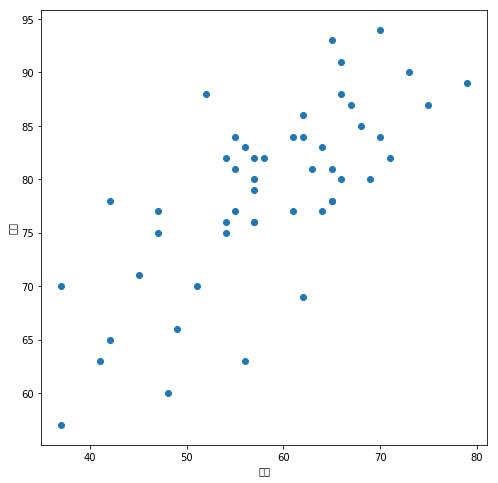

In [13]:
english_scores = np.array(df['英語'])
math_scores = np.array(df['数学'])
fig = plt.figure(figsize=(8,8))
ax = fig.add_subplot(111)
ax.scatter(english_scores, math_scores)
ax.set_xlabel('英語')
ax.set_ylabel('数学')
plt.show()

In [15]:
poly_fit = np.polyfit(english_scores, math_scores, 1)
poly_1d = np.poly1d(poly_fit)
xs = np.linspace(english_scores.min(), english_scores.max())
ys = poly_1d(xs)

In [20]:
poly_fit

array([ 0.621, 42.601])

In [21]:
poly_1d(1)

43.222747344754744

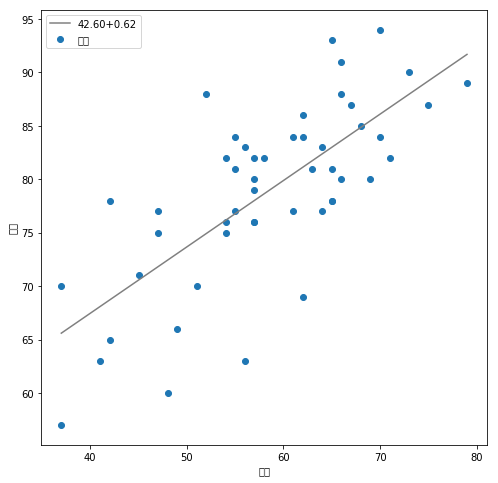

In [22]:
fig = plt.figure(figsize=(8,8))
ax = fig.add_subplot(111)
ax.set_xlabel('英語')
ax.set_ylabel('数学')
ax.scatter(english_scores, math_scores, label='点数')
ax.plot(xs, ys, color='gray', label=f'{poly_fit[1]:.2f}+{poly_fit[0]:.2f}')
ax.legend(loc='upper left')
plt.show()

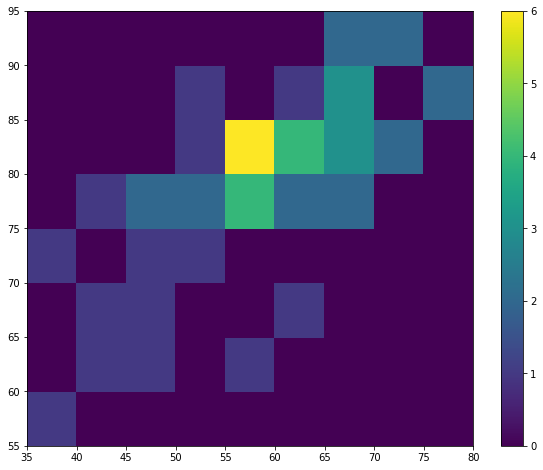

In [23]:
fig = plt.figure(figsize=(10,8))
ax = fig.add_subplot(111)
c = ax.hist2d(english_scores, math_scores, bins=[9,8], range=[(35,80), (55,95)])
ax.set_xticks(c[1])
ax.set_yticks(c[2])
fig.colorbar(c[3], ax=ax)
plt.show()